# Predicting Boston Housing Prices


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print(f"Boston housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each.")

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

In [3]:
# Calculate the statistics
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print(f"Minimum price: ${minimum_price:,.2f}")
print(f"Maximum price: ${maximum_price:,.2f}")
print(f"Mean price: ${mean_price:,.2f}")
print(f"Median price: ${median_price:,.2f}")
print(f"Standard deviation of prices: ${std_price:,.2f}")

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

### Implementation: Define a Performance Metric
To quantify your model's performance, calculate the coefficient of determination, R², which ranges from 0 to 1. A model with R² of 0 is no better than predicting the mean, while R² of 1 perfectly predicts the target. Use `r2_score` from `sklearn.metrics` to compute the performance score.

In [4]:
#Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
#Import 'train_test_split'

from sklearn.model_selection import train_test_split as tts

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = tts(features, prices, test_size=.20, random_state=40)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

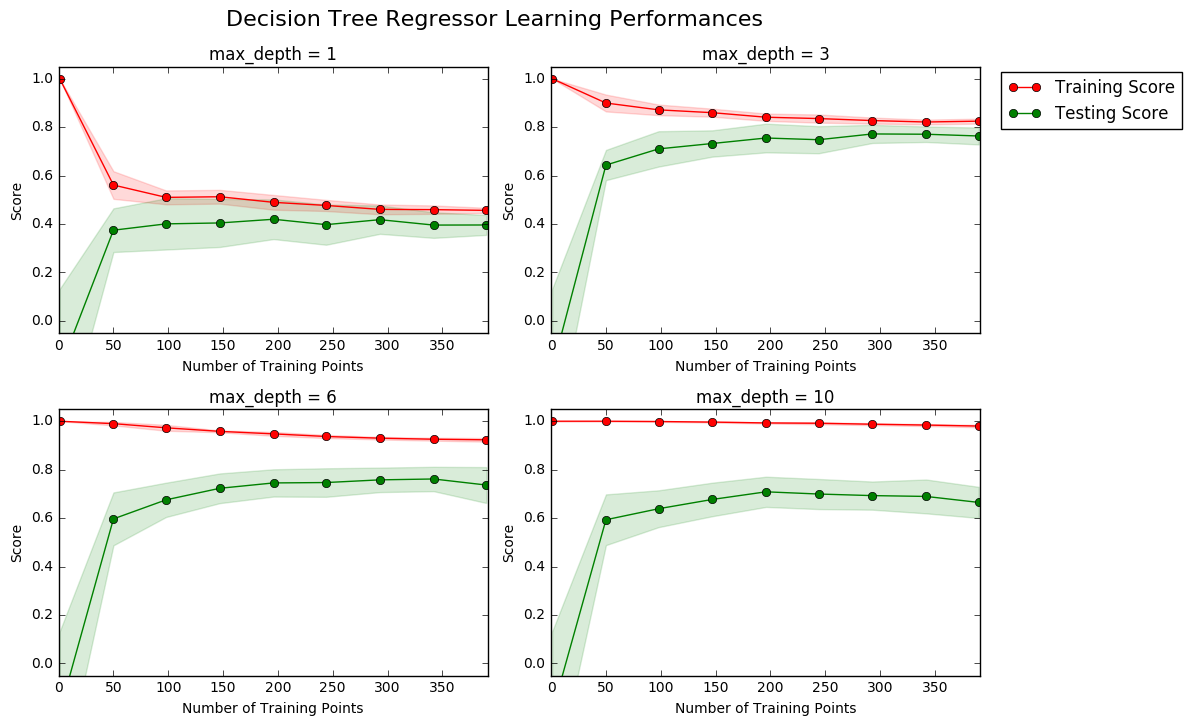

In [20]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

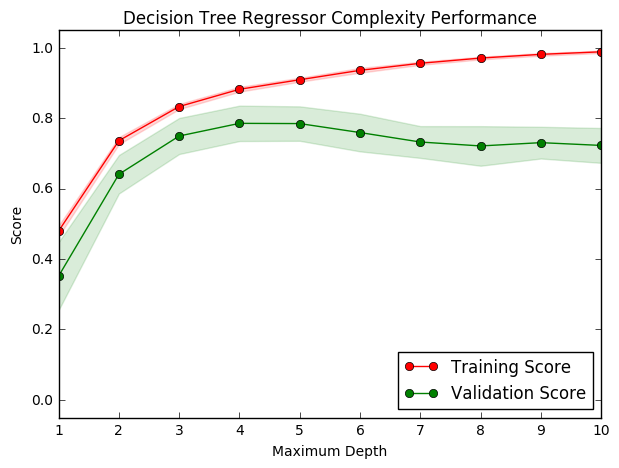

In [21]:
vs.ModelComplexity(X_train, y_train)

In [7]:
#Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV' from the correct modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    """Performs grid search over the 'max_depth' parameter for a 
    decision tree regressor trained on the input data [X, y]."""
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    #Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    #Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}
    
    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [8]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 4 for the optimal model.


In [9]:
# Produce a matrix for client data
client_data = [[5, 17, 15],  # Client 1
               [4, 32, 22],  # Client 2
               [8, 3, 12]]   # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $921,900.00


c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Client 1's home: $411,096.00, Client 2's home: $219,961.54, Client 3's home: $921,900.00. These prices align with the expectations based on the features and the trends observed in the data exploration section.

Evaluate the `fit_model` function ten times with different training and testing sets to observe how the prediction for a specific client changes.

In [25]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
